In [1]:
using Gen;
using PyPlot;
#using Plots;

In [2]:
@gen function line_model(xs::Vector{Float64})
    n = length(xs)
    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, 0.1), (:y, i))
    end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return n
end;

In [3]:
xs = [-5., -4., -3., -.2, -1., 0., 1., 2., 3., 4., 5.]
n = line_model(xs)
println(n)

11


In [4]:
trace = Gen.simulate(line_model, (xs,));
println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Vector{Float64}], false, Union{Nothing, Some{Any}}[nothing], var"##line_model#257", Bool[0], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((:y, 8) => Gen.ChoiceOrCallRecord{Float64}(3.5915495936529496, -0.7353963351551289, NaN, true), (:y, 6) => Gen.ChoiceOrCallRecord{Float64}(0.5761854931924536, 0.8499476546031636, NaN, true), (:y, 3) => Gen.ChoiceOrCallRecord{Float64}(-4.00138306421295, 1.38284231517552, NaN, true), (:y, 5) => Gen.ChoiceOrCallRecord{Float64}(-0.7992278694706612, 1.0618093180855848, NaN, true), :intercept => Gen.ChoiceOrCallRecord{Float64}(0.6795004393702656, -1.6698008196526661, NaN, true), (:y, 4) => Gen.ChoiceOrCallRecord{Float64}(0.5131391289605057, 0.32614916386132986, NaN, true), (:y, 11) => Gen.ChoiceOrCallRecord{Float64}(8.491430085294184, 1.3689550616229158, NaN, true), (:y, 9) => Gen.ChoiceOrCallRecord{Float64}(5.3

In [5]:
function render_trace(trace; show_data=true)
    
    # Pull out xs from the trace
    xs = get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        
        # Plot the data set
        scatter(xs, ys, c="black")
    end
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    
    # Draw the line
    plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept, color="black", alpha=0.5)
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end;

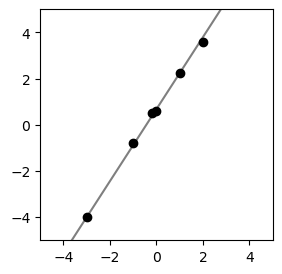

In [6]:
figure(figsize=(3,3))
render_trace(trace);

In [7]:
function grid(renderer::Function, traces; ncols=6, nrows=3)
    figure(figsize=(16, 8))
    for (i, trace) in enumerate(traces)
        subplot(nrows, ncols, i)
        renderer(trace)
    end
end;

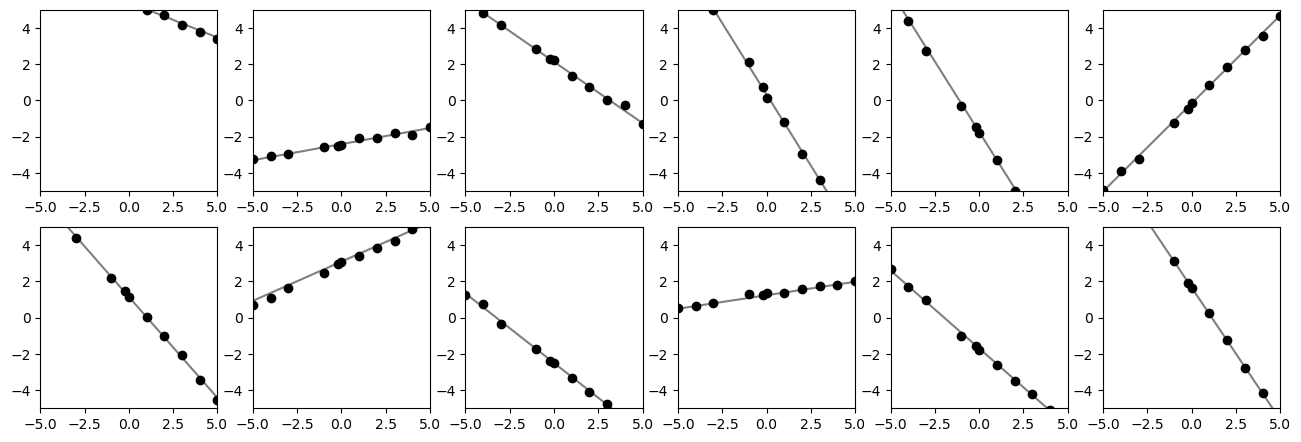

In [8]:
traces = [Gen.simulate(line_model, (xs,)) for _=1:12]
grid(render_trace, traces)

In [10]:
@gen function two_line_model(xs::Vector{Float64})
    n = length(xs)
    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, 0.1), (:y1, i))
        @trace(normal(slope * x + intercept + 0.5, 0.1), (:y2, i))
    end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return n
end;

In [17]:
xs = [-5., -4., -3., -.2, -1., 0., 1., 2., 3., 4., 5.]
n = two_line_model(xs)
println(n)
trace = Gen.simulate(two_line_model, (xs,));

11


In [18]:
test = get_args(trace)[1]

11-element Vector{Float64}:
 -5.0
 -4.0
 -3.0
 -0.2
 -1.0
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0

In [23]:
function render_trace2(trace; show_data=true)
    
    # Pull out xs from the trace
    xs = get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    if show_data
        ys1 = [trace[(:y1, i)] for i=1:length(xs)]
        ys2 = [trace[(:y2, i)] for i=1:length(xs)]
        
        # Plot the data set
        #scatter(xs, ys1, c="black")
        #scatter(xs, ys2, c="black")
    end
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    
    # Draw the line
    plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept, color="black", alpha=0.5)
    plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept .+ 0.5, color="black", alpha=0.5)
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end;

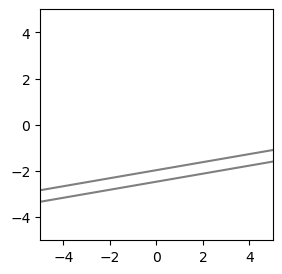

In [24]:
figure(figsize=(3,3))
render_trace2(trace);

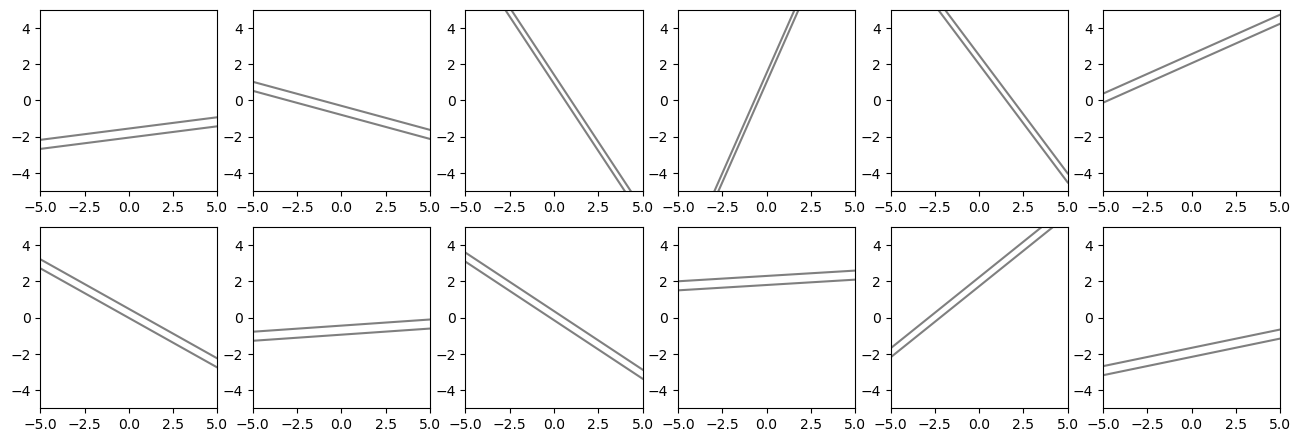

In [25]:
traces = [Gen.simulate(two_line_model, (xs,)) for _=1:12]
grid(render_trace2, traces)

<h1> Test 3D plots </h1>

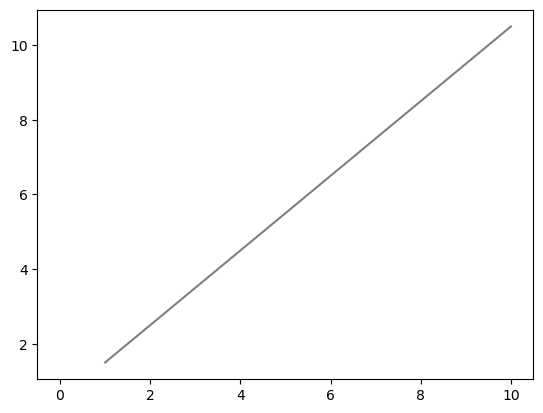

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001205F40>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001205F70>

In [30]:
xmin = 1
xmax = 10
intercept = 0.5
slope=1
plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept,3, color="black", alpha=0.5)

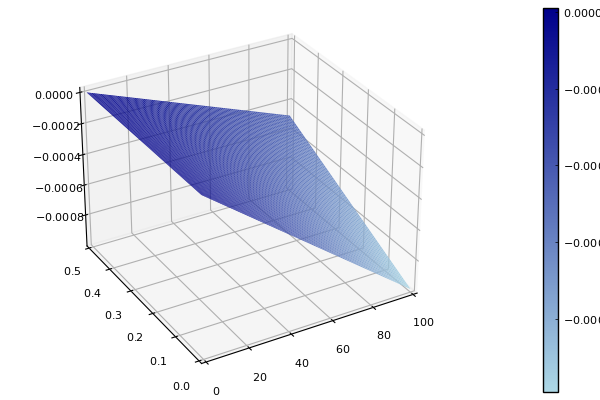

In [59]:
using Plots; pyplot()

x=range(0,stop=100,length=100)
y=range(0,stop=0.5,length=100)

f(x,y) = (x*y-x-y+1)*0.00001

Plots.plot(x,y,f,st=:surface, c=:blues, camera=(-30,30))

In [45]:
x=range(-2,stop=2,length=100)
y=range(0,stop=0.1,length=100)
println(x)
println(y)

-2.0:0.04040404040404041:2.0
0.0:0.00101010101010101:0.1


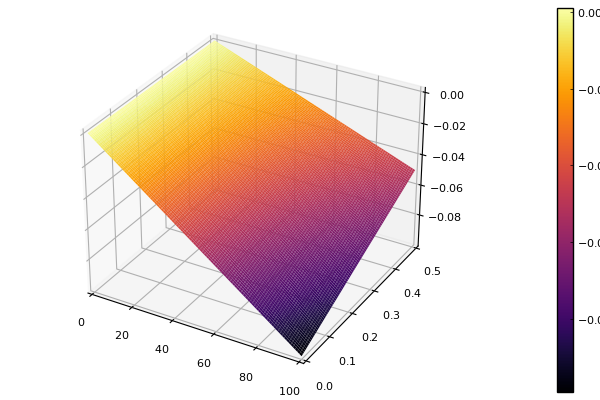

In [58]:
surface(x, y, f)

In [60]:
using Plotly

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10549309898544748266\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9054451711287266488\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10549309898544748266\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

    Updating registry at `C:\Users\fredi\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Plotly ────────────── v0.3.0
   Installed TestImages ────────── v1.5.0
   Installed Images ────────────── v0.24.1
   Installed PlutoUI ───────────── v0.7.1
   Installed SymPy ─────────────── v1.0.49
   Installed Plots ─────────────── v1.2.2
   Installed Colors ────────────── v0.12.8
   Installed Pluto ─────────────── v0.14.7
   Installed LZO_jll ───────────── v2.10.1+0
   Installed libvorbis_jll ─────── v1.3.7+0
   Installed FFMPEG ────────────── v0.3.0
   Installed DocStringExtensions ─ v0.8.5
   Installed HTTP ──────────────── v0.8.19
   Installed StatsBase ─────────── v0.33.8
   Installed Libuuid_jll ───────── v2.36.0+0
   Installed Fontconfig_jll ────── v2.13.93+0
   Installed Pixman_jll ────────── v0.40.1+0
   Installed DataFrames ────────── v1.1.1
   Installed Graphite2_jll ─────── v1.3.14+0
   Ins

  [bd369af6] ↑ Tables v1.4.2 ⇒ v1.4.4
  [5e47fb64] ↑ TestImages v1.4.0 ⇒ v1.5.0
  [731e570b] ↑ TiffImages v0.3.1 ⇒ v0.4.1
  [5c2747f8] - URIs v1.2.0
  [6e34b625] ↑ Bzip2_jll v1.0.6+5 ⇒ v1.0.8+0
  [83423d85] ↑ Cairo_jll v1.16.0+6 ⇒ v1.16.1+0
  [5ae413db] - EarCut_jll v2.1.5+1
  [2e619515] ↑ Expat_jll v2.2.7+6 ⇒ v2.2.10+0
  [b22a6f82] ↑ FFMPEG_jll v4.3.1+4 ⇒ v4.4.0+0
  [a3f928ae] ↑ Fontconfig_jll v2.13.1+14 ⇒ v2.13.93+0
  [d7e528f0] ↑ FreeType2_jll v2.10.1+5 ⇒ v2.10.4+0
  [559328eb] ↑ FriBidi_jll v1.0.5+6 ⇒ v1.0.10+0
  [0656b61e] - GLFW_jll v3.3.3+0
  [d2c73de3] - GR_jll v0.57.2+0
  [78b55507] ↑ Gettext_jll v0.20.1+7 ⇒ v0.21.0+0
  [7746bdde] ↑ Glib_jll v2.59.0+4 ⇒ v2.68.1+0
  [3b182d85] + Graphite2_jll v1.3.14+0
  [2e76f6c2] + HarfBuzz_jll v2.8.1+0
  [aacddb02] ↑ JpegTurbo_jll v2.0.1+3 ⇒ v2.1.0+0
  [c1c5ebd0] ↑ LAME_jll v3.100.0+3 ⇒ v3.100.1+0
  [dd4b983a] ↑ LZO_jll v2.10.0+3 ⇒ v2.10.1+0
  [dd192d2f] - LibVPX_jll v1.9.0+1
  [e9f186c6] ↑ Libffi_jll v3.2.1+4 ⇒ v3.2.2+0
  [d4300ac3] ↑ Libgc

  ? HarfBuzz_jll
  ? libass_jll
  ? TestImages
  ? ImageMetadata
  ? FFMPEG_jll
  ? Images
  ? FFMPEG
  ? Plots
29 dependencies successfully precompiled in 52 seconds (97 already precompiled)
89 dependencies failed but may be precompilable after restarting julia


In [66]:

data = [
  [
    "z" => [27.80985 27.71966 30.4267 16.66549 8.815617 6.628881 21.83975 53.34303 25.66785 12.827 0 0 0 0 0 0 0 0 0 0 0 0 0 0.001229679 0; 49.61936 48.55022 33.47752 30.1086 18.3516 10.41339 6.63927 26.79797 63.05717 69.20554 68.66396 95.17499 134.9879 48.08919 54.1941 6.919659 21.73871 0 0 0 0 0 0 3.008948 5.626141; 83.08067 65.21374 44.80953 39.96952 8.658275 24.81939 18.97085 6.63927 22.1414 46.76293 59.0435 80.03818 130.3696 142.5558 146.3839 195.1709 123.1339 62.04672 79.62993 33.2664 29.77937 31.409 19.58994 5.909858 7.676256; 116.6632 95.27666 62.47495 44.12225 27.5859 26.08952 32.89204 10.88787 17.074 13.96517 33.35762 59.89862 96.86325 140.3777 99.48143 132.5253 176.7414 136.3122 139.6978 57.53643 54.97282 132.7418 42.30355 33.50574 63.16226; 130.414 116.9964 77.43523 59.57512 48.62691 30.1605 43.15014 17.2044 41.74483 33.88744 47.45282 39.58476 75.70494 154.7261 96.19411 135.2341 158.2698 201.7952 173.167 167.2241 144.7995 185.5796 96.26777 104.3341 45.99762; 150.7206 133.9056 104.2153 77.56929 60.18013 52.30802 62.86014 56.18116 60.27227 61.82613 57.8355 50.28058 58.86466 87.9361 102.9473 89.85069 137.235 168.1343 192.8718 196.4833 207.4904 121.8299 187.1207 152.2165 79.56688; 220.1871 152.3412 102.7393 106.8925 91.3286 64.71007 104.6657 79.70141 81.42432 84.74799 78.91689 63.81641 57.20374 58.11092 76.14089 89.45549 105.3089 95.2046 196.3499 194.7966 165.3432 185.3841 179.6626 198.1988 227.311; 156.1536 151.934 137.0004 166.5539 145.7109 76.30823 130.2294 90.8453 114.444 121.122 107.8275 80.61302 55.18837 52.83869 57.7844 60.29967 86.63255 58.90624 144.6611 182.1884 171.4047 160.6566 221.3898 191.841 203.9287; 148.6416 160.1139 186.0706 175.2381 116.0653 84.63686 114.8494 98.27675 102.3234 145.2741 168.0053 66.37824 78.128 67.14822 47.0402 50.33806 53.11591 46.94091 106.5424 119.6961 174.9216 116.1478 154.2617 228.7349 172.5618; 203.7845 179.5327 219.3173 185.2815 106.2662 99.4324 106.9873 80.87243 101.7878 153.1797 130.9597 198.7651 108.5582 83.66798 64.36799 39.17583 29.03865 49.27053 57.16653 73.02113 100.2733 118.1078 142.1604 168.1041 177.1462; 206.0386 147.6184 181.7615 154.5056 68.69447 62.52132 61.89647 74.7931 111.031 204.786 212.5541 244.3467 154.3774 118.9242 84.23767 59.06854 30.40539 37.10416 41.16107 48.36549 61.46441 141.7946 148.5737 144.2759 140.4554; 107.1618 170.3943 120.9154 83.0433 53.10596 46.81647 55.55682 75.54661 119.2309 227.9242 165.8122 294.2474 319.1686 150.0681 162.7181 74.52159 39.04902 17.97011 32.12764 33.74652 50.19171 65.56351 67.17937 110.7436 123.9905; 68.36975 121.8194 143.1835 62.61732 37.92797 55.76606 86.80986 73.4373 114.0777 236.3038 210.2429 264.3517 372.8826 272.9709 121.3275 84.93402 49.23405 30.93697 13.8566 26.2379 26.08209 48.84066 40.69044 57.65214 110.346; 45.3359 52.58537 82.40501 62.33167 47.95942 82.4099 89.27802 74.11694 110.5296 228.3655 181.1713 176.4082 275.4655 341.1366 213.1646 187.1219 63.27853 33.39257 10.91772 16.3578 17.18218 23.13864 39.74512 42.63504 65.12319; 49.96142 33.08871 48.47132 60.55916 47.42691 140.2647 122.4221 68.1749 59.19355 79.34425 189.7617 60.21857 130.2632 238.664 328.482 123.9673 111.4215 44.03077 12.07177 6.811293 8.468093 18.12932 26.10166 27.91891 34.31887; 21.89279 38.40972 74.71461 55.92124 69.20731 81.26501 123.9698 46.24076 42.47175 25.93483 137.3378 77.41475 54.93822 190.2 285.4489 103.7027 101.1956 55.64542 22.38254 6.63927 6.63927 10.28531 14.48469 15.41052 24.5278; 17.02552 44.24843 60.0909 15.17284 44.95468 56.45756 109.0952 39.93857 14.63598 6.944074 84.65395 53.16981 25.49719 116.8943 283.8319 128.986 40.00962 78.22423 24.72105 6.639271 6.334467 6.029663 8.65873 8.056102 9.561069; 11.74317 69.5786 7.073525 8.248324 29.17197 30.42164 98.41956 31.21653 6.944074 6.944074 8.677168 56.16393 8.047439 91.48672 212.815 165.1283 59.84565 14.42782 6.803666 8.468093 6.334467 6.044627 3.896037 3.90283 3.334991; 14.75226 4.019351 6.089851 36.68087 17.91674 17.28782 77.61374 36.88335 6.944075 6.944075 6.956576 6.949235 8.084393 14.0157 164.549 249.7054 74.51253 9.954997 4.200841 6.194273 5.666687 5.694764 3.571392 3.879774 5.590495; 13.6671 3.050024 6.53745 61.93413 16.25515 8.302431 32.49031 40.02525 27.74936 7.553681 8.468093 7.531059 5.115252 42.29277 92.29631 95.39966 17.06316 7.768213 16.46857 3.591233 4.272203 3.739085 3.896037 3.936718 5.487353; 5.677561 3.039719 6.666096 20.26867 14.65559 2.981626 14.67344 117.4297 0 0 0 3.780177 5.678269 5.115252 7.244015 10.00284 2.435141 13.0254 15.70744 3.81486 0 3.896037 3.896037 3.968634 5.909499; 3.31234 2.996142 7.306965 68.58819 17.26048 2.698536 7.370775 12.70328 0 0 0 0 0 0 1.167 2.39255 2.287471 21.73166 33.96221 8.600739 0 0 3.896037 0.1236256 5.868994; 1.156517 2.967954 5.73684 46.49812 31.22245 5.886086 0.03711011 1.729771 0.09449376 0 0 0 0 0 0 0 -0.0003636982 2.156372 7.575688 5.21889 0 0 1.077756 3.985531 5.833817; -0.147662 1.999594 3.625628 0.2360095 46.71704 5.268358 0.6423392 0 0.07732264 0 0 0 0 0 0 0 0 0.5317867 -0.04880907 0 0 0 0 -0.1835741 3.568177],
    "type" => "surface"
  ]
]
layout = [
  "title" => "Mt Bruno Elevation",
  "autosize" => false,
  "width" => 500,
  "height" => 500,
  "margin" => [
    "l" => 65,
    "r" => 50,
    "b" => 65,
    "t" => 90
  ]
]
response = Plotly.plot(data, ["layout" => layout, "filename" => "elevations-3d-surface", "fileopt" => "overwrite"])
plot_url = response["url"]

LoadError: MethodError: no method matching Plot(::Vector{Vector{Pair{String, Any}}}, ::Vector{Pair{String, Any}})
[0mClosest candidates are:
[0m  Plot([91m::AbstractVector{T}[39m, ::AbstractVector{T} where T) where T<:Union{Dates.Date, Dates.DateTime, AbstractString, Number, Symbol} at C:\Users\fredi\.julia\packages\PlotlyBase\1bJ0U\src\convenience_api.jl:18
[0m  Plot([91m::AbstractVector{T}[39m, ::AbstractVector{T} where T, [91m::Layout[39m; kind, style, kwargs...) where T<:Union{Dates.Date, Dates.DateTime, AbstractString, Number, Symbol} at C:\Users\fredi\.julia\packages\PlotlyBase\1bJ0U\src\convenience_api.jl:18
[0m  Plot(::AbstractVector{T}, [91m::AbstractMatrix{T} where T[39m) where T<:(AbstractVector{T} where T) at C:\Users\fredi\.julia\packages\PlotlyBase\1bJ0U\src\convenience_api.jl:30
[0m  ...

In [69]:
Plotly.plot(scatter(x=0:40, y=(0:40).^2, mode="lines"))

LoadError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\fredi\.julia\packages\PyCall\BD546\src\pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'PathCollection' object has no property 'mode'")
  File "C:\Users\fredi\.julia\conda\3\lib\site-packages\matplotlib\pyplot.py", line 2890, in scatter
    __ret = gca().scatter(
  File "C:\Users\fredi\.julia\conda\3\lib\site-packages\matplotlib\__init__.py", line 1447, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\fredi\.julia\conda\3\lib\site-packages\matplotlib\cbook\deprecation.py", line 411, in wrapper
    return func(*inner_args, **inner_kwargs)
  File "C:\Users\fredi\.julia\conda\3\lib\site-packages\matplotlib\axes\_axes.py", line 4498, in scatter
    collection.update(kwargs)
  File "C:\Users\fredi\.julia\conda\3\lib\site-packages\matplotlib\artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "
